In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl

# 1. Read data

In [5]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 2. Data preprocessing- check missing value

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 2.1 Missingno패키지를 통한 Null데이터 시각화 

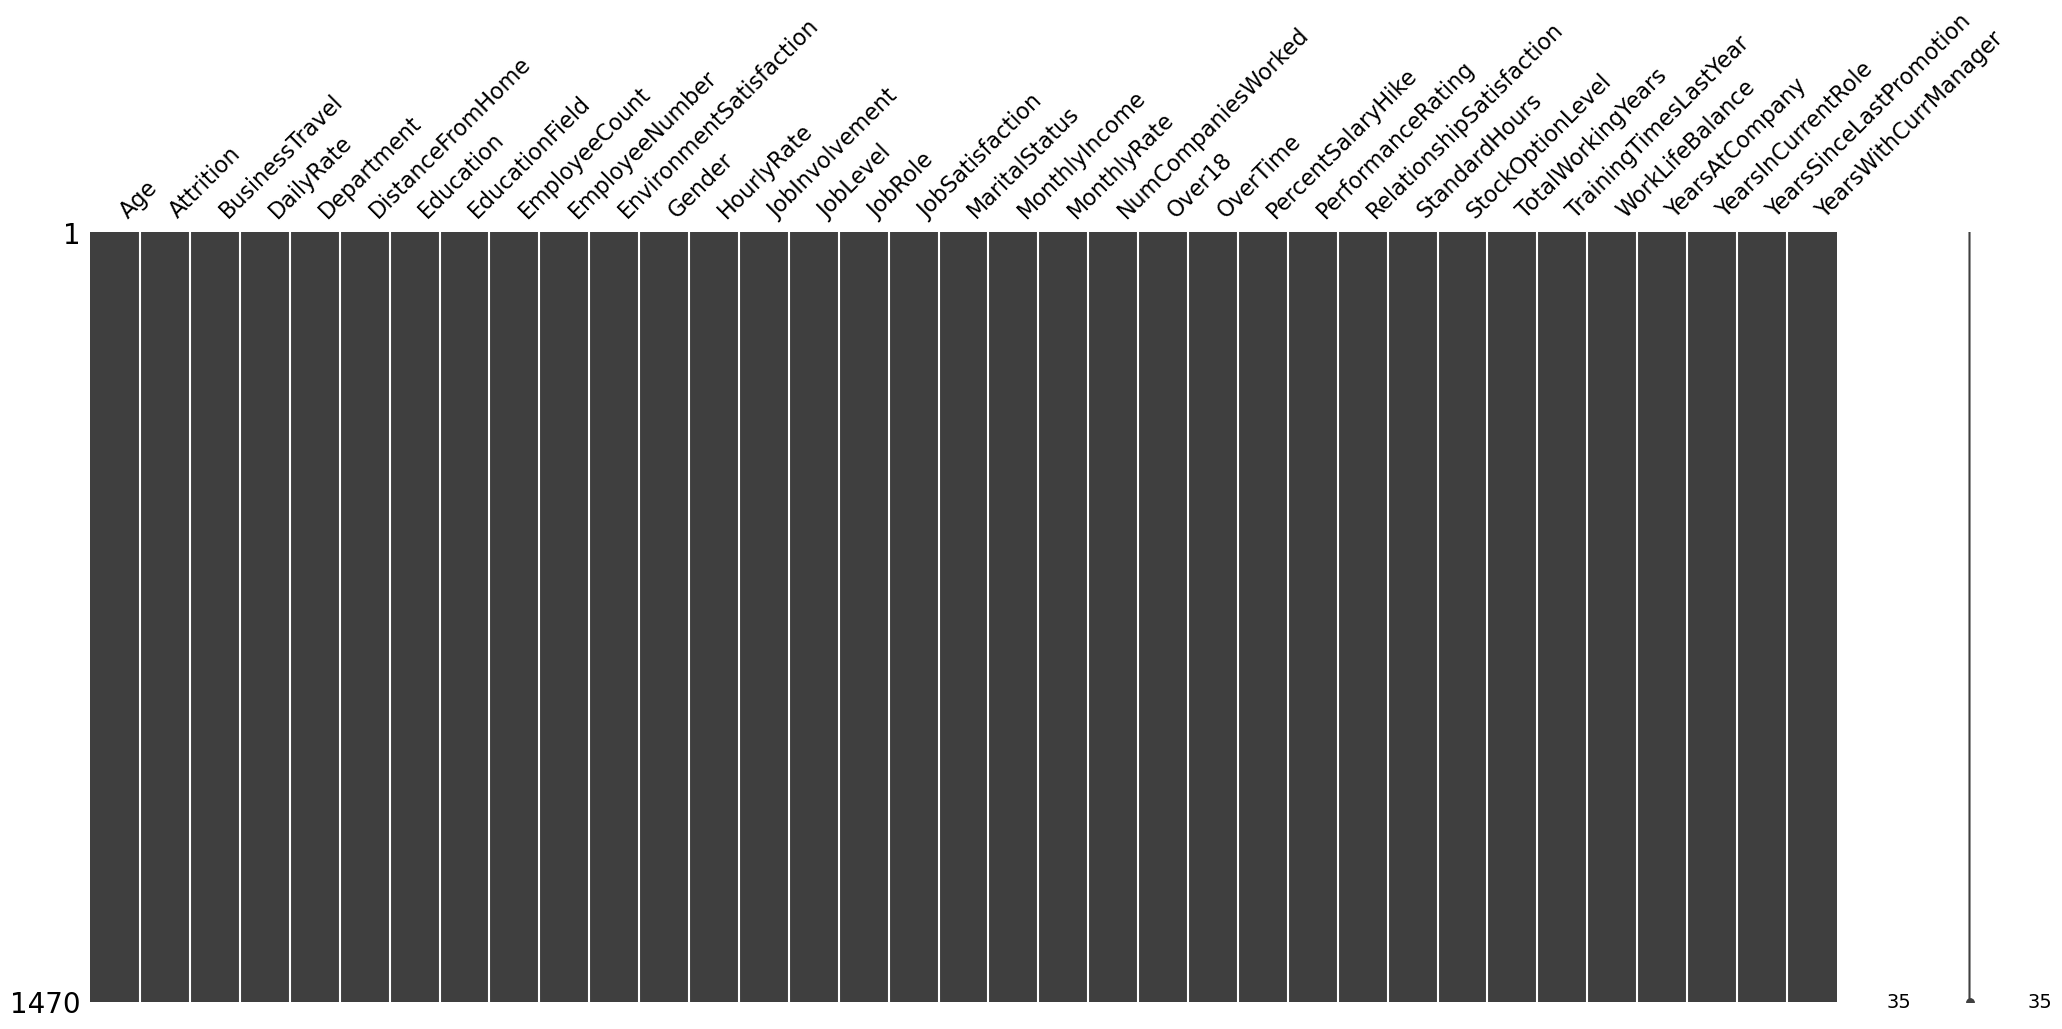

In [6]:
msno.matrix(df)
plt.show()

결측치 데이터가 없음을 알 수 있다. 

# 3. EDA

## 3.1 Attrition 비율 확인

In [7]:
print('Attrition 비율')
print(f'{df.Attrition.value_counts().index[0]} : {round(df.Attrition.value_counts()[0] / len(df), 2) * 100}%')
print(f'{df.Attrition.value_counts().index[1]} : {round(df.Attrition.value_counts()[1] / len(df), 2) * 100}%')

Attrition 비율
No : 84.0%
Yes : 16.0%


Attribution 비율 시각화 

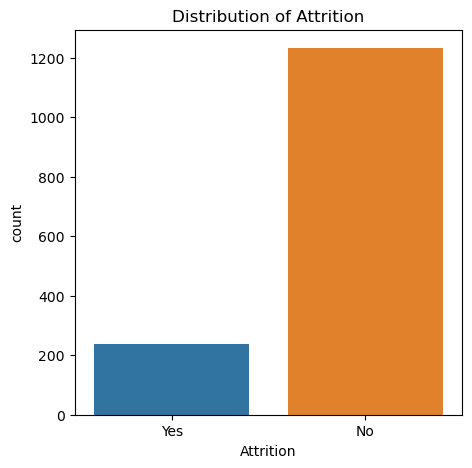

In [8]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['Attrition'])
plt.title('Distribution of Attrition')
plt.show()

퇴사자는 전체의 16%이다. 

## 3.2 Skewness 왜도 

* Skewness > 1 = highly positively skewed
* Skewness < -1 = highly negatively skewed
* Skewness close to 0 = 정규분포 

In [9]:
# attrition 퇴사율을 제외한 나머지 컬럼들에 대한 왜도값, 오름차수으로 정렬하여 나타난다. 
skew_df = pd.concat((df.drop('Attrition',axis =1), df), axis =0).skew(numeric_only=True).sort_values()
skew_df

WorkLifeBalance            -0.552198
JobInvolvement             -0.498165
JobSatisfaction            -0.329504
EnvironmentSatisfaction    -0.321490
RelationshipSatisfaction   -0.302673
Education                  -0.289533
HourlyRate                 -0.032294
DailyRate                  -0.003517
EmployeeCount               0.000000
StandardHours               0.000000
EmployeeNumber              0.016566
MonthlyRate                 0.018568
Age                         0.413075
TrainingTimesLastYear       0.552842
PercentSalaryHike           0.820709
YearsWithCurrManager        0.833025
YearsInCurrentRole          0.916895
DistanceFromHome            0.957629
StockOptionLevel            0.968485
JobLevel                    1.024878
NumCompaniesWorked          1.025947
TotalWorkingYears           1.116601
MonthlyIncome               1.369117
YearsAtCompany              1.763628
PerformanceRating           1.920901
YearsSinceLastPromotion     1.983277
dtype: float64

왜도 시각화 

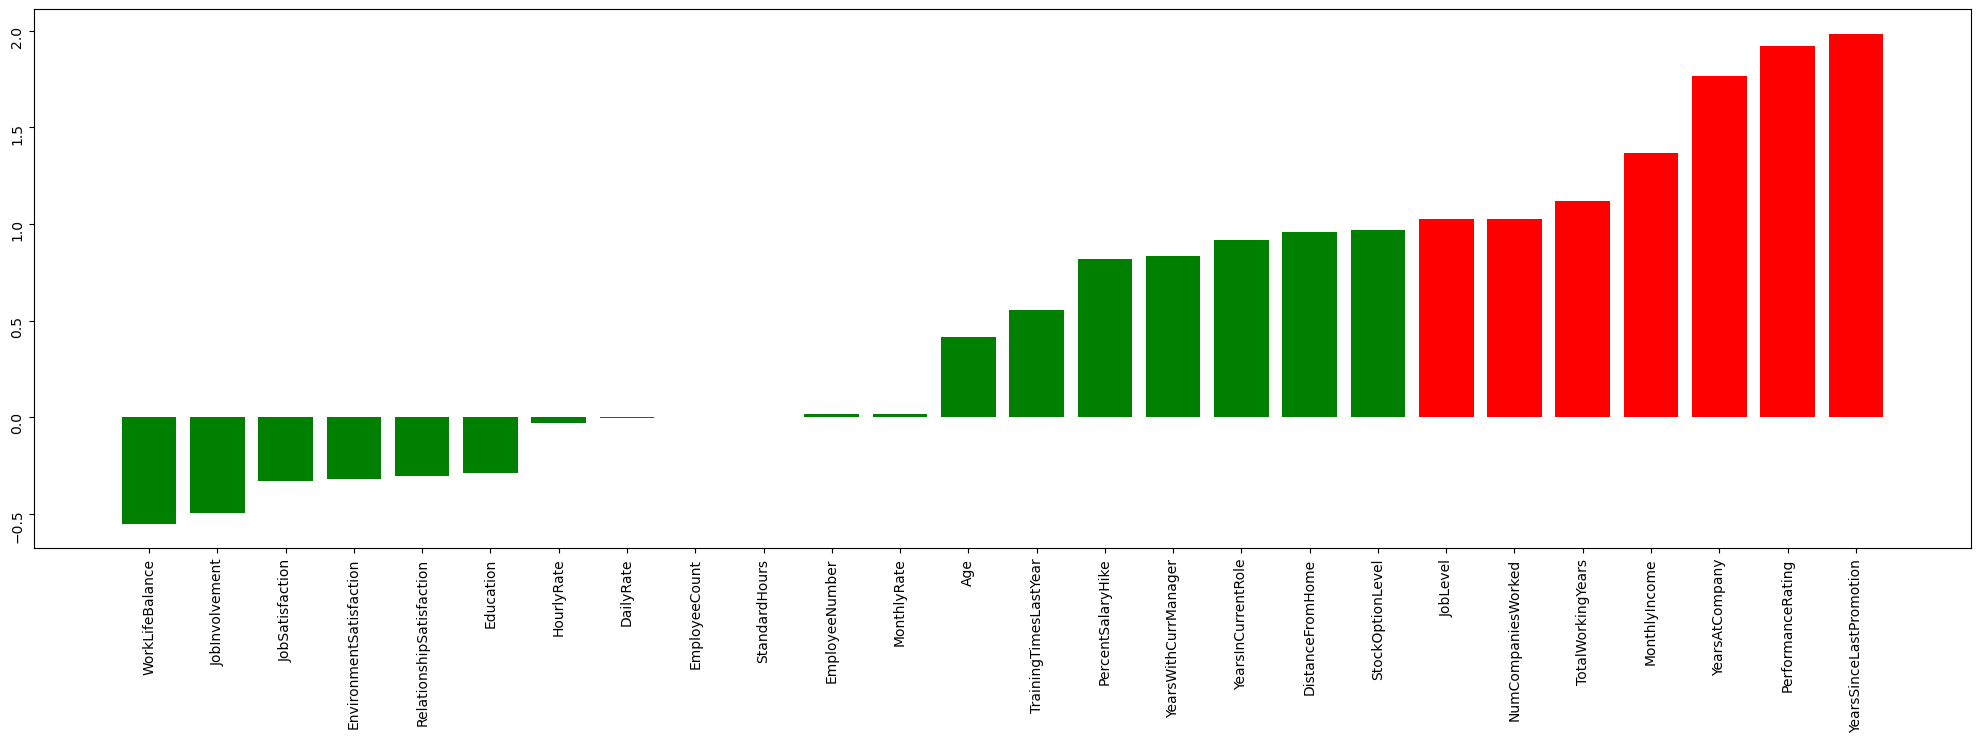

In [10]:
fig,ax = plt.subplots(figsize=(25,7))

# -1 < 왜도값 < 1이면 대칭적이라고 본다.
ax.bar(x = skew_df[(skew_df<1) & (skew_df>-1)].index, height = skew_df[(skew_df<1) & (skew_df>-1)], color = "g")
# -1보다 작거나 1보다 클 경우 상당히 치우친 것이다.
ax.bar(x = skew_df[skew_df>1].index, height = skew_df[skew_df>1], color = "r")
ax.bar(x = skew_df[skew_df<-1].index, height = skew_df[skew_df<-1], color = "b")

ax.tick_params(labelrotation=90)

* "StandardHours","EmployeeCount"는 왜도값이 0이므로 삭제한다.
* 두 컬럼은 한 가지 값만 가지고 있다. 

In [11]:
df = df.drop(['StandardHours','EmployeeCount'], axis= 1)

## 3.3 Column 분포 확인(categorical or numerical)

### 3.3.1 Categorical Column

Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance, JobLevel, StockOptionLevel, NumCompaniesWorked
컬럼들의 경우 category 컬럼인데 int형을 되어있어 형변환을 해준다. 

In [12]:
# Education
change_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
df.replace({'Education': change_dict}, inplace=True)
df['Education'].unique()
# EnvironmentSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'EnvironmentSatisfaction': change_dict}, inplace=True)
df['EnvironmentSatisfaction'].unique()
# JobInvolvement
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'JobInvolvement': change_dict}, inplace=True)
df['JobInvolvement'].unique()
# JobSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'JobSatisfaction': change_dict}, inplace=True)
df['JobSatisfaction'].unique()
# PerformanceRating
change_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
df.replace({'PerformanceRating': change_dict}, inplace=True)
df['PerformanceRating'].unique()
# RelationshipSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'RelationshipSatisfaction': change_dict}, inplace=True)
df['RelationshipSatisfaction'].unique()
# WorkLifeBalance
change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
df.replace({'WorkLifeBalance': change_dict}, inplace=True)
df['WorkLifeBalance'].unique()
# JobLevel, StockOptionLevel, TrainingTimesLastYear, NumCompaniesWorked, TotalWorkingYears
df = df.astype({'JobLevel': object, 'StockOptionLevel': object, 'NumCompaniesWorked': object})

In [13]:
categorical_cols = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_cols.append(column)
        print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
        print(f'{column} : {[df[column].unique()]}')
        print(f'{df[column].value_counts()}')
        print()
print()
print(f'object column 갯수 : {len(categorical_cols)}')

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
Attrition : [array(['Yes', 'No'], dtype=object)]
No     1233
Yes     237
Name: Attrition, dtype: int64

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
BusinessTravel : [array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)]
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
Department : [array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)]
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
Education : [array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)]
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

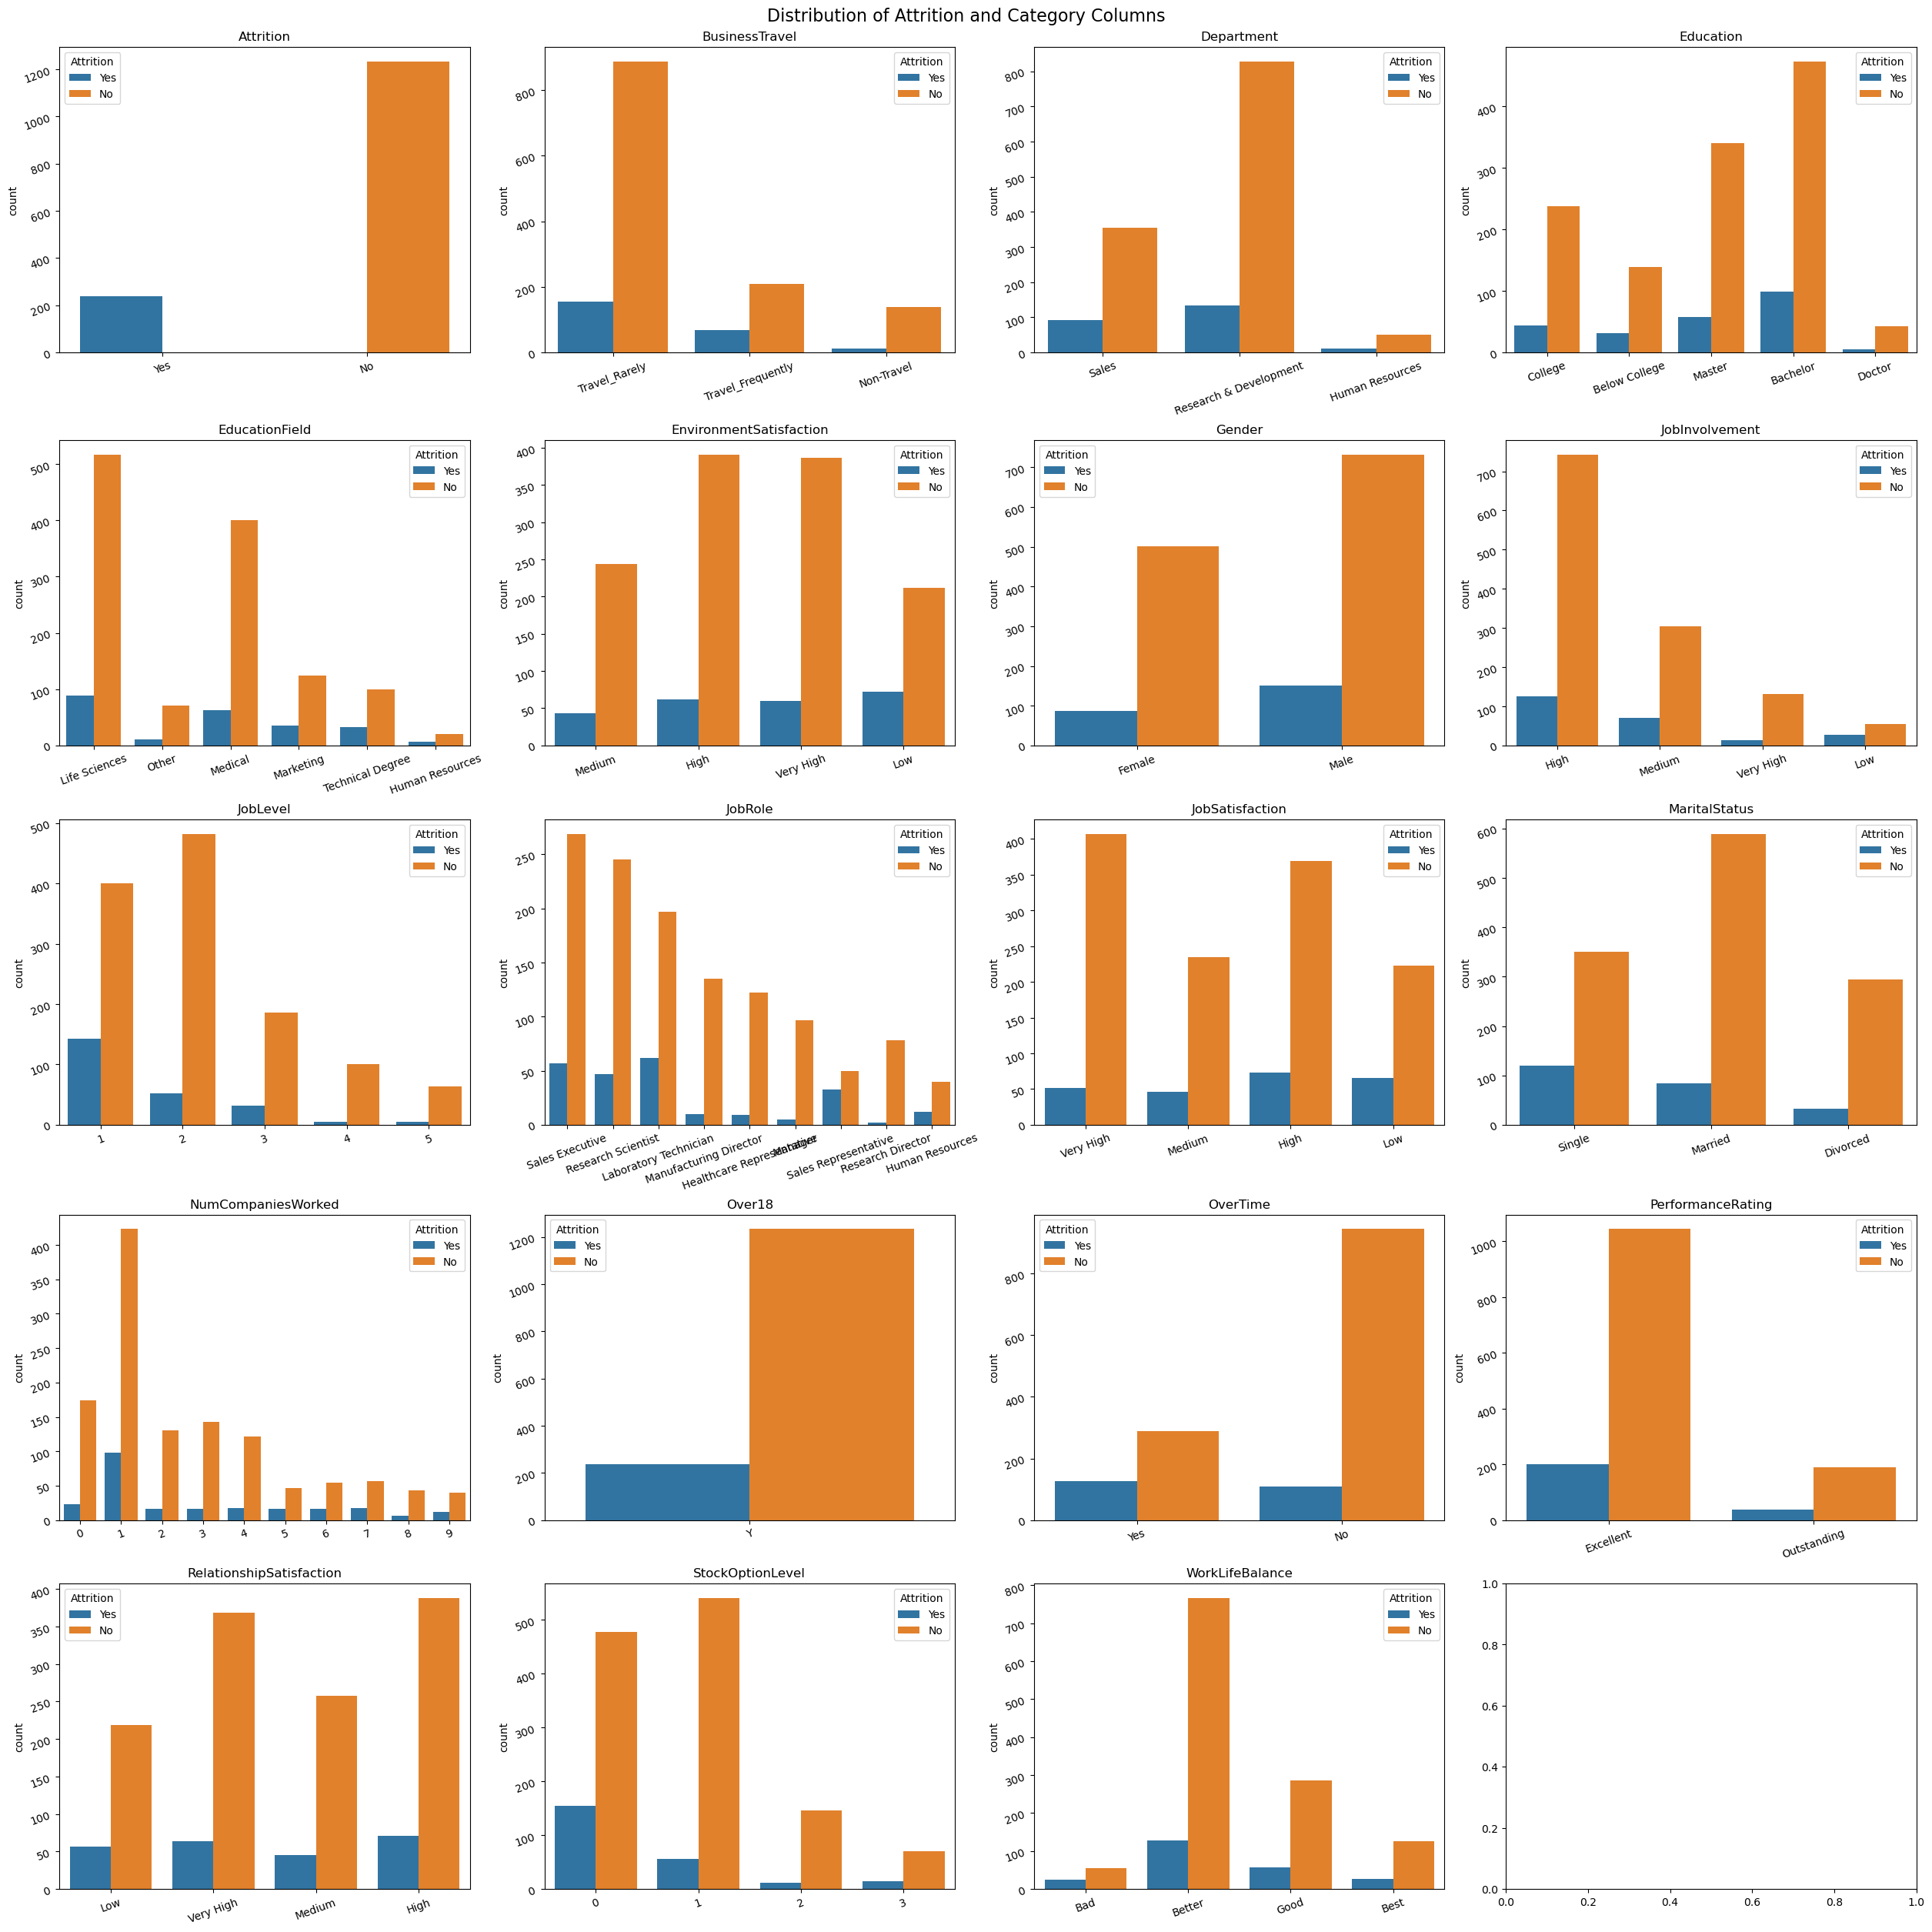

In [14]:
# category column 그래프로 보기
fig, ax = plt.subplots(5, 4, figsize=(25, 25), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Distribution of Attrition and Category Columns', fontsize=16)

for i in range(len(categorical_cols)):
    sns.countplot(x=categorical_cols[i], data=df,
                      hue="Attrition", ax=ax[i]).set(xlabel = None)
    ax[i].set(title = categorical_cols[i])
    
    ax[i].tick_params(labelrotation=20)
    
plt.show()

* Department(근무부서) : 근무부서에 따라 퇴사 여부가 달라짐이 보입니다. 일단 눈으로 볼땐 HR부서가 가장 적어보이지만, 모수가 적기 때문에 자세히 확인해볼 필요가 있습니다.
* EnvironmentSatisfaction(근무환경 만족도) : 근무환경 만족도에 따라서 퇴사 여부가 확인될듯 싶었는데, 아래에서 자세히 확인해봐야할듯 싶습니다.
* JobSatisfaction(직업 만족도) : 직업 만족에 따른 퇴사 여부도 확인해 보아야겠습니다.
* StockOptionLevel(스톡옵션 레벨) : 스톡옵션이 없거나 낮은 직원이 많이 떠나는것으로 보입니다. 확인해볼 필요가 있어 보입니다.
* WorkLifeBalance(워라벨의 정도) : 워라벨이 중요한 사람들은 퇴사를 많이하는지 확인이 필요합니다. 만일 그렇다면 해당 회사는 워라벨이 좋지 않은 회사 인듯 합니다.

### 3.3.2 Numerical Column

In [15]:
# Numerical column
cont_cols = []
for column in df.columns:
    if df[column].dtype != object:
        cont_cols.append(column)
        print(f'{column} : {df[column].nunique()}')
        print('==============================')
print()
print(f'수치형 column의 갯수 : {len(cont_cols)} 개')

Age : 43
DailyRate : 886
DistanceFromHome : 29
EmployeeNumber : 1470
HourlyRate : 71
MonthlyIncome : 1349
MonthlyRate : 1427
PercentSalaryHike : 15
TotalWorkingYears : 40
TrainingTimesLastYear : 7
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18

수치형 column의 갯수 : 14 개


* EmployeeNumber는 값이 1470개로 모든 Row마다 값이 유니크함으로, 삭제가 필요    

박스 그래프로 시각화 

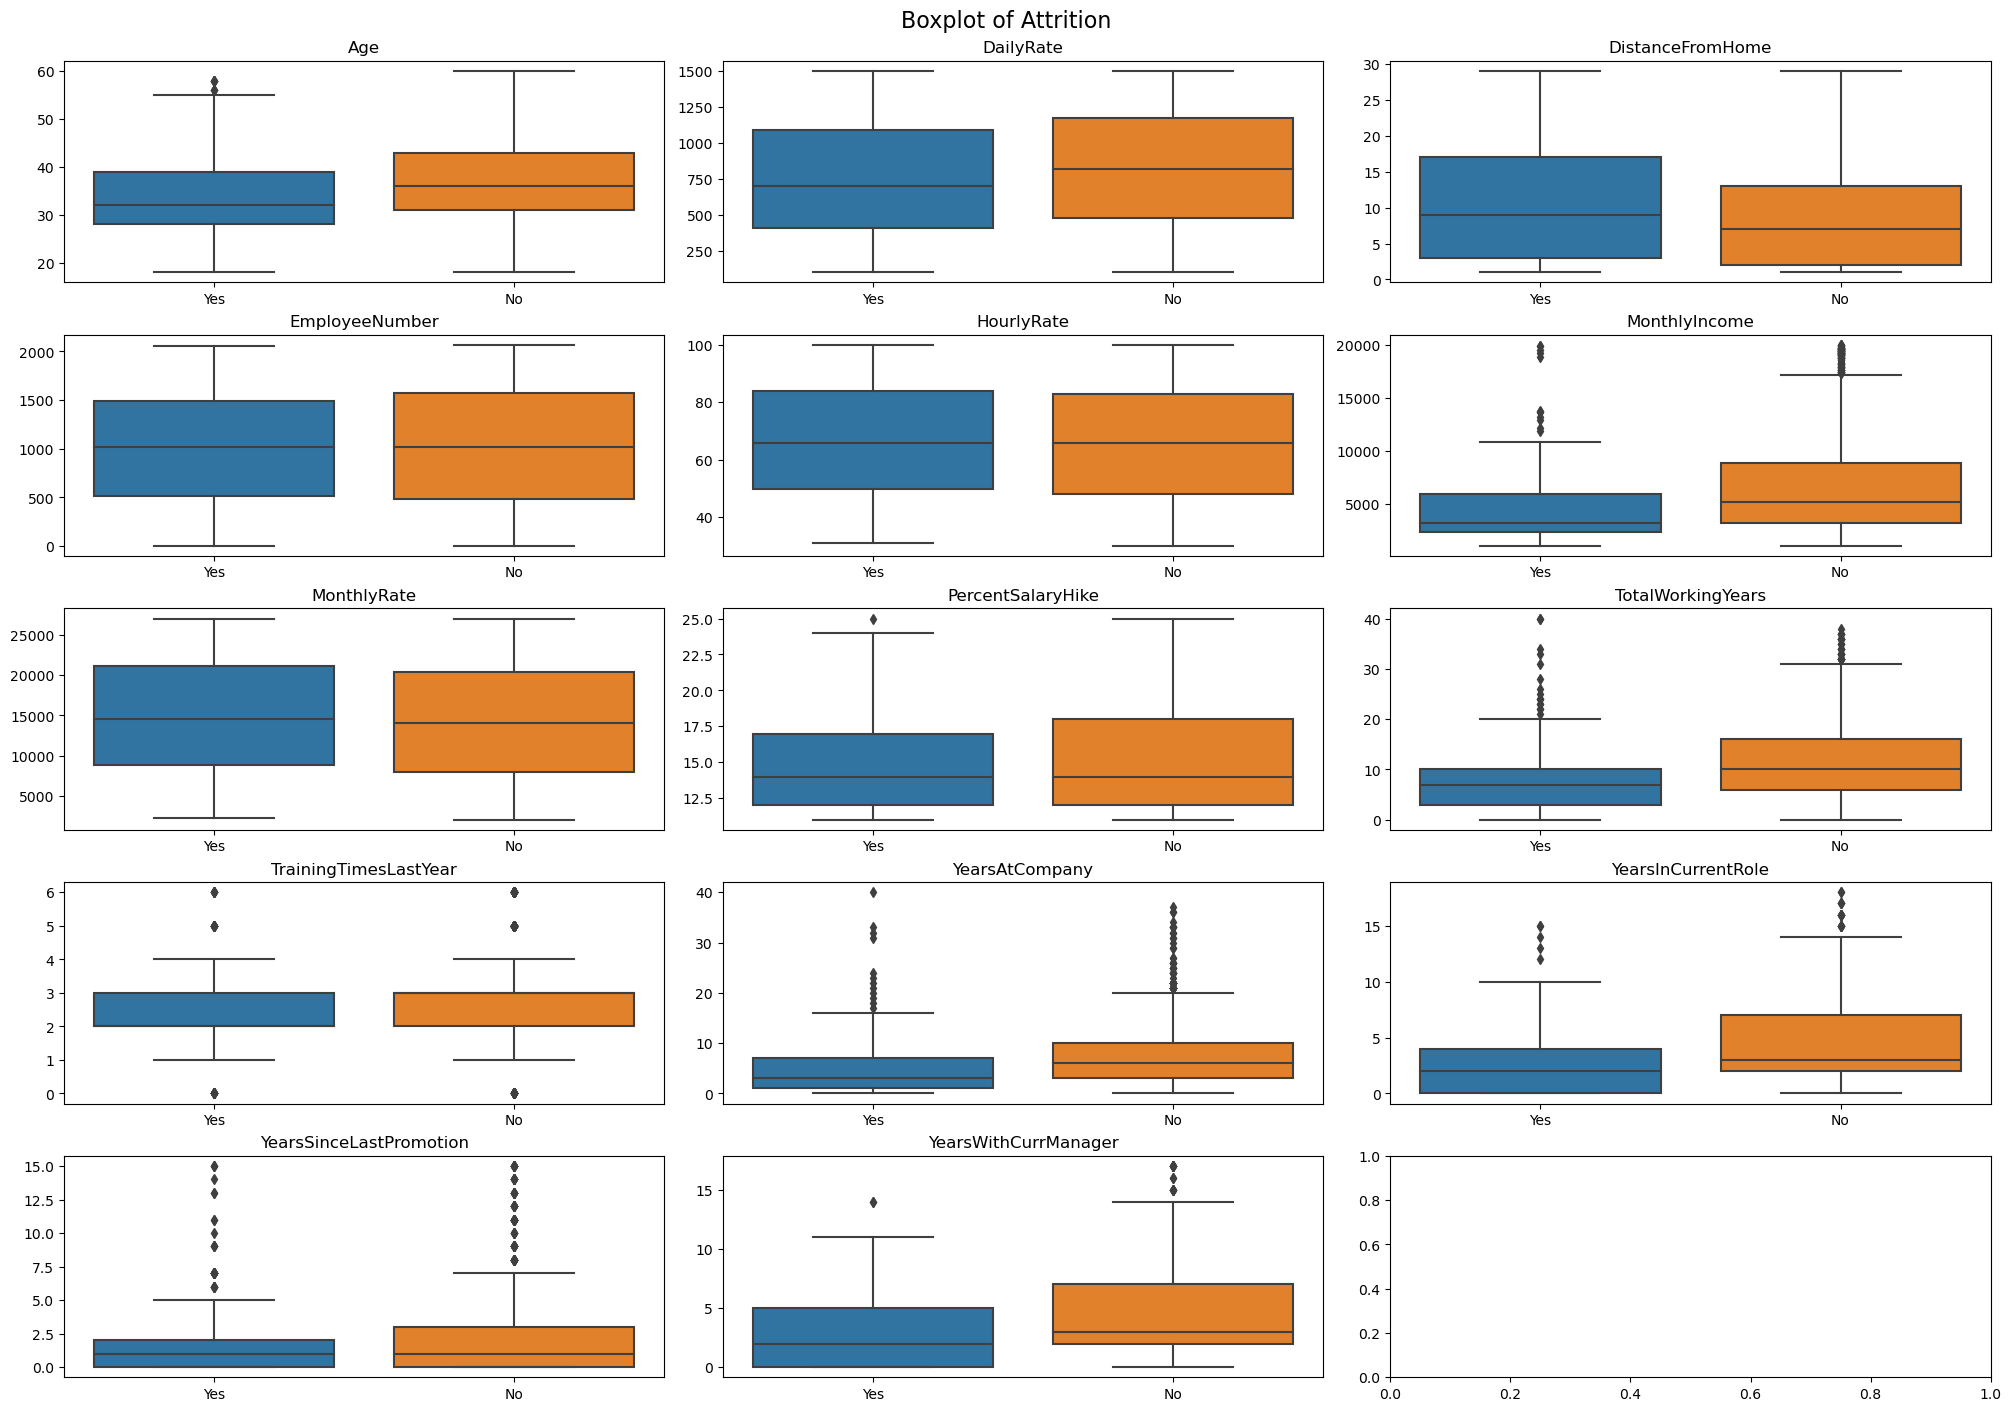

In [16]:
# boxplot
fig, ax = plt.subplots(5, 3, figsize=(20, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(len(cont_cols)):
    ax[i].set(title = cont_cols[i])
    sns.boxplot(x=df['Attrition'], y = df[cont_cols[i]], ax=ax[i]).set(xlabel=None,  ylabel=None)
    
plt.show()

* AGE : 나이가 어릴 수록 퇴사를 많이한다. 
* MonthlyIncome (월급여) : 대체로 월 급여가 적으면 퇴사합니다. 많아도 퇴사를 하는 극단치가 있다.
* DistanceFromHome (집과의 거리) : 집과 거리가 멀면 퇴사를 하는 경향이있다.
* YearsInCurrentRole (현재 역할의 연수) : 대체로 초창기에 퇴직을 많이 한다.
* YearsWithCurrManager (현재 관리자와 같이 일한 연도) : 관리자와 오래일하는 직원들이 퇴사를 덜하는 경향이 있다.
* TotalWorkingYears (총 경력) : 경력이 짧을때 퇴사를 많이 한다. 경력이 많은 사람들도 퇴사를 하는 경향이 있는데 정년퇴임을 예상할 수도 있을 것 같다. 

### 3.3.3 Outlier 검토

이상치가 있는 컬럼들
* TrainingTimeLastYear
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager
* TotalWorkingYears
* MonthlyIncome

In [36]:
outliers = ['TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'MonthlyIncome']

In [29]:
# outlier확인 함수
def outlier(df, col):
    q1 = np.percentile(df[col], 25) 
    q3 = np.percentile(df[col], 75)
    IQR = q3 - q1
    outlier_step = 1.5 * IQR
    return df[(df[col] < q1 - outlier_step) | (df[col] > q3 + outlier_step)]


In [37]:
for outlr in outliers:
    print(f'{outlr}의 아웃라이어 개수 {outlier(df, outlr).shape[0]}개')
    print(f'전체 데이터의 {round(outlier(df, outlr).shape[0] / df.shape[0],2)}%')

TrainingTimesLastYear의 아웃라이어 개수 238개
전체 데이터의 0.16%
YearsAtCompany의 아웃라이어 개수 104개
전체 데이터의 0.07%
YearsInCurrentRole의 아웃라이어 개수 21개
전체 데이터의 0.01%
YearsSinceLastPromotion의 아웃라이어 개수 107개
전체 데이터의 0.07%
YearsWithCurrManager의 아웃라이어 개수 14개
전체 데이터의 0.01%
TotalWorkingYears의 아웃라이어 개수 63개
전체 데이터의 0.04%
MonthlyIncome의 아웃라이어 개수 114개
전체 데이터의 0.08%


* 추후 VIF계수와 함께 비교하여 처리를 진행함

## 3.4 컬럼 삭제

* EmployeeNumber은 1, Over18은 Y로 각각 하나의 값만 가지므로 분석에 필요 업성 삭제 

In [17]:
# EmployeeNumber, Over18
print('Over18 : ', df['Over18'].unique()[0])
print('EmployeeNumber : ', df['EmployeeNumber'].unique()[0])
df.drop(['Over18', 'EmployeeNumber'], axis = 1, inplace = True)
print(df.shape)
df.tail()

Over18 :  Y
EmployeeNumber :  1
(1470, 31)


Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
1465                23        College        Medical                    High   
1466                 6  Below College        Medical               Very High   
1467                 4       Bachelor  Life Sciences                  Medium   
1468                 2       Bachelor        Medical               Very High   
1469                 8       Bachelor        Medical                  Medium   

     Gender  ...  PerformanceRating RelationshipSatisfaction StockOptionLevel  \
1465   Male  ...          Excellent                     High                1   
1466   Male  ...          Excellent                      Low                1   
1467   Male  ...        Outstanding                   Medium                1   
1468   Male  ...          Excellent                Very High                0   
1469   Male  ...          Excellent                      Low                0   

     TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1465                17                     3          Better               5   
1466                 9                     5          Better               7   
1467                 6                     0          Better               6   
1468                17                     3            Good               9   
1469                 6                     3            Best               4   

      YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager  
1465                   2                       0                    3  
1466                   7                       1                    7  
1467                   2                       0                    3  
1468                   6                       0                    8  
1469                   3                       1                    2  

[5 rows x 31 columns]

## 3.5 상관관계

### 3.5.1상관관계 히트맵으로 보기

c:\Users\lbhde\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


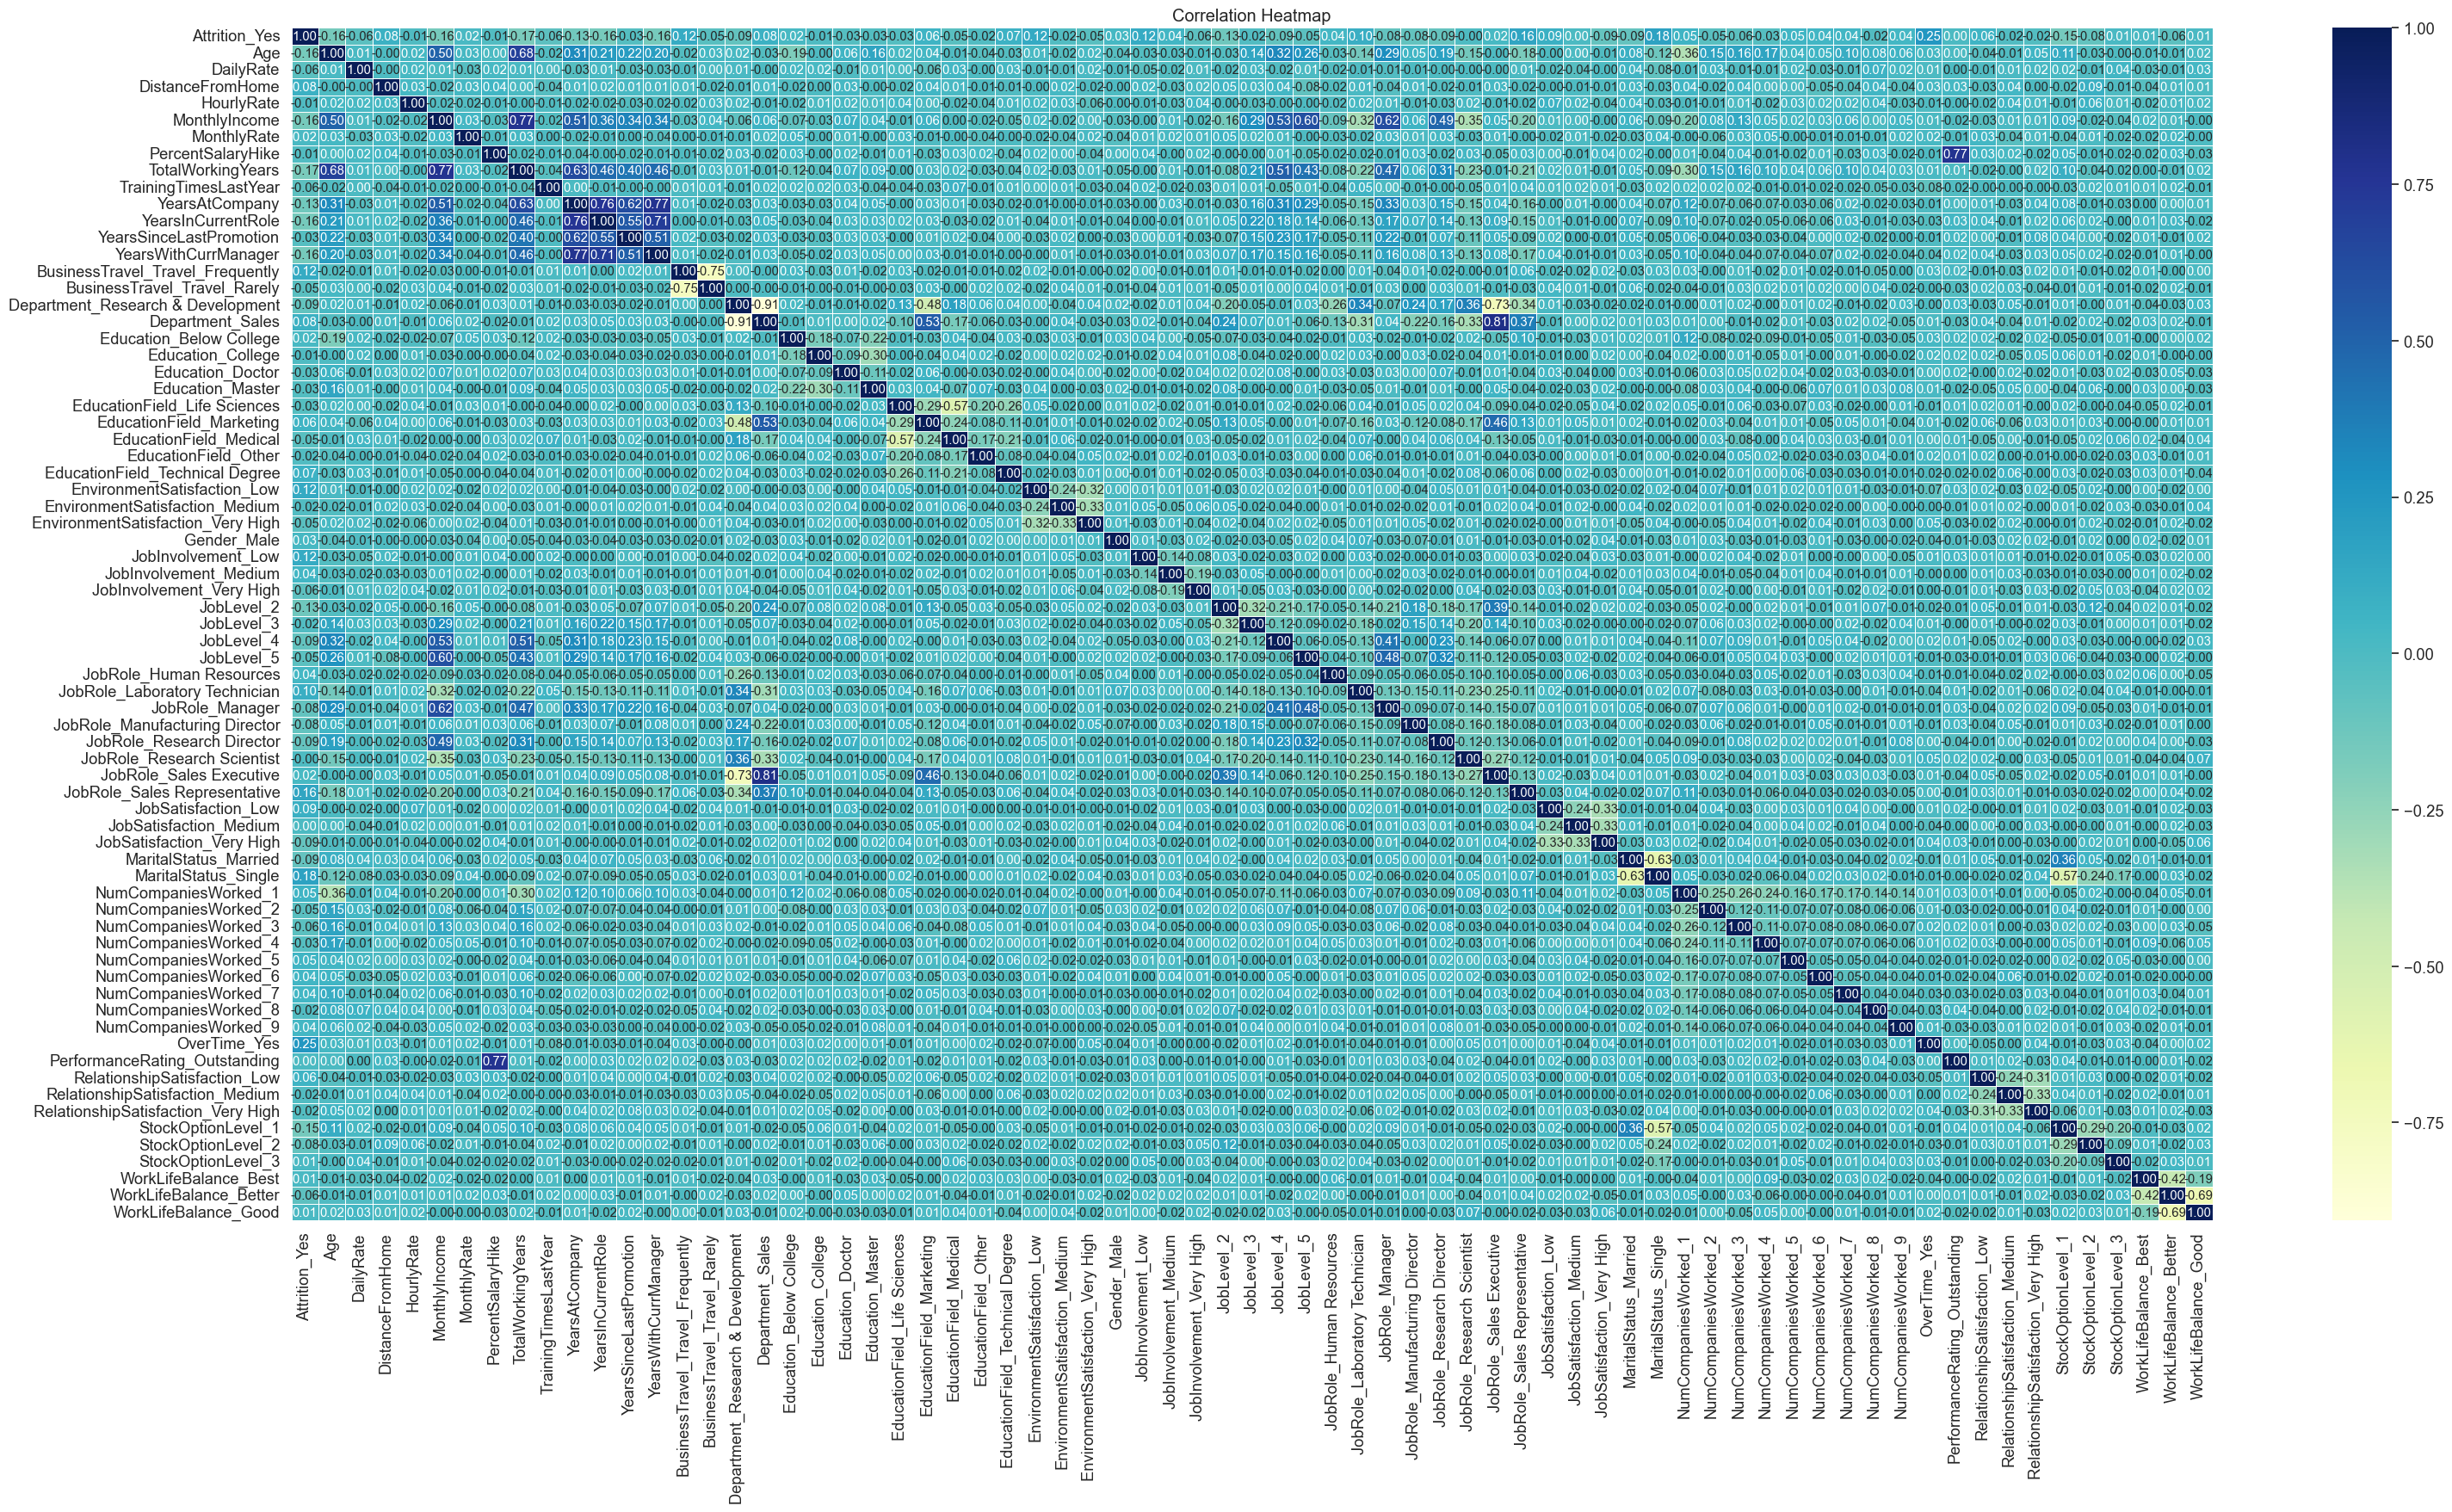

In [18]:
df_cp = df.copy()
# 가변수 생성 
df_cp = pd.get_dummies(df_cp, drop_first=True)
df_cp = df_cp[['Attrition_Yes'] + [column for column in df_cp.columns if column != 'Attrition_Yes']]
df_corr = df_cp.corr()

plt.figure(figsize=(36, 18))
sns.set(font_scale = 1.2)
sns.heatmap(df_corr,annot=True, annot_kws = {"size" : 90 /np.sqrt(len(df_corr))}, 
            fmt = '.2f', cmap = 'YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 3.5.2 상관관계 있는 것만 따로 보기

In [19]:
temps = df_corr[(df_corr > 0.4) | (df_corr < -0.4)]
high_corr = []
for col in temps.columns:
    temp = temps[col].dropna()
    
    # 자기 자신과의 상관계수 제외
    if len(temp) == 1:
        continue
    high_corr.append([temp.name, temp.to_dict()])

In [20]:
# 기존과 다르게 순서가 저장된 dictionary
from collections import OrderedDict

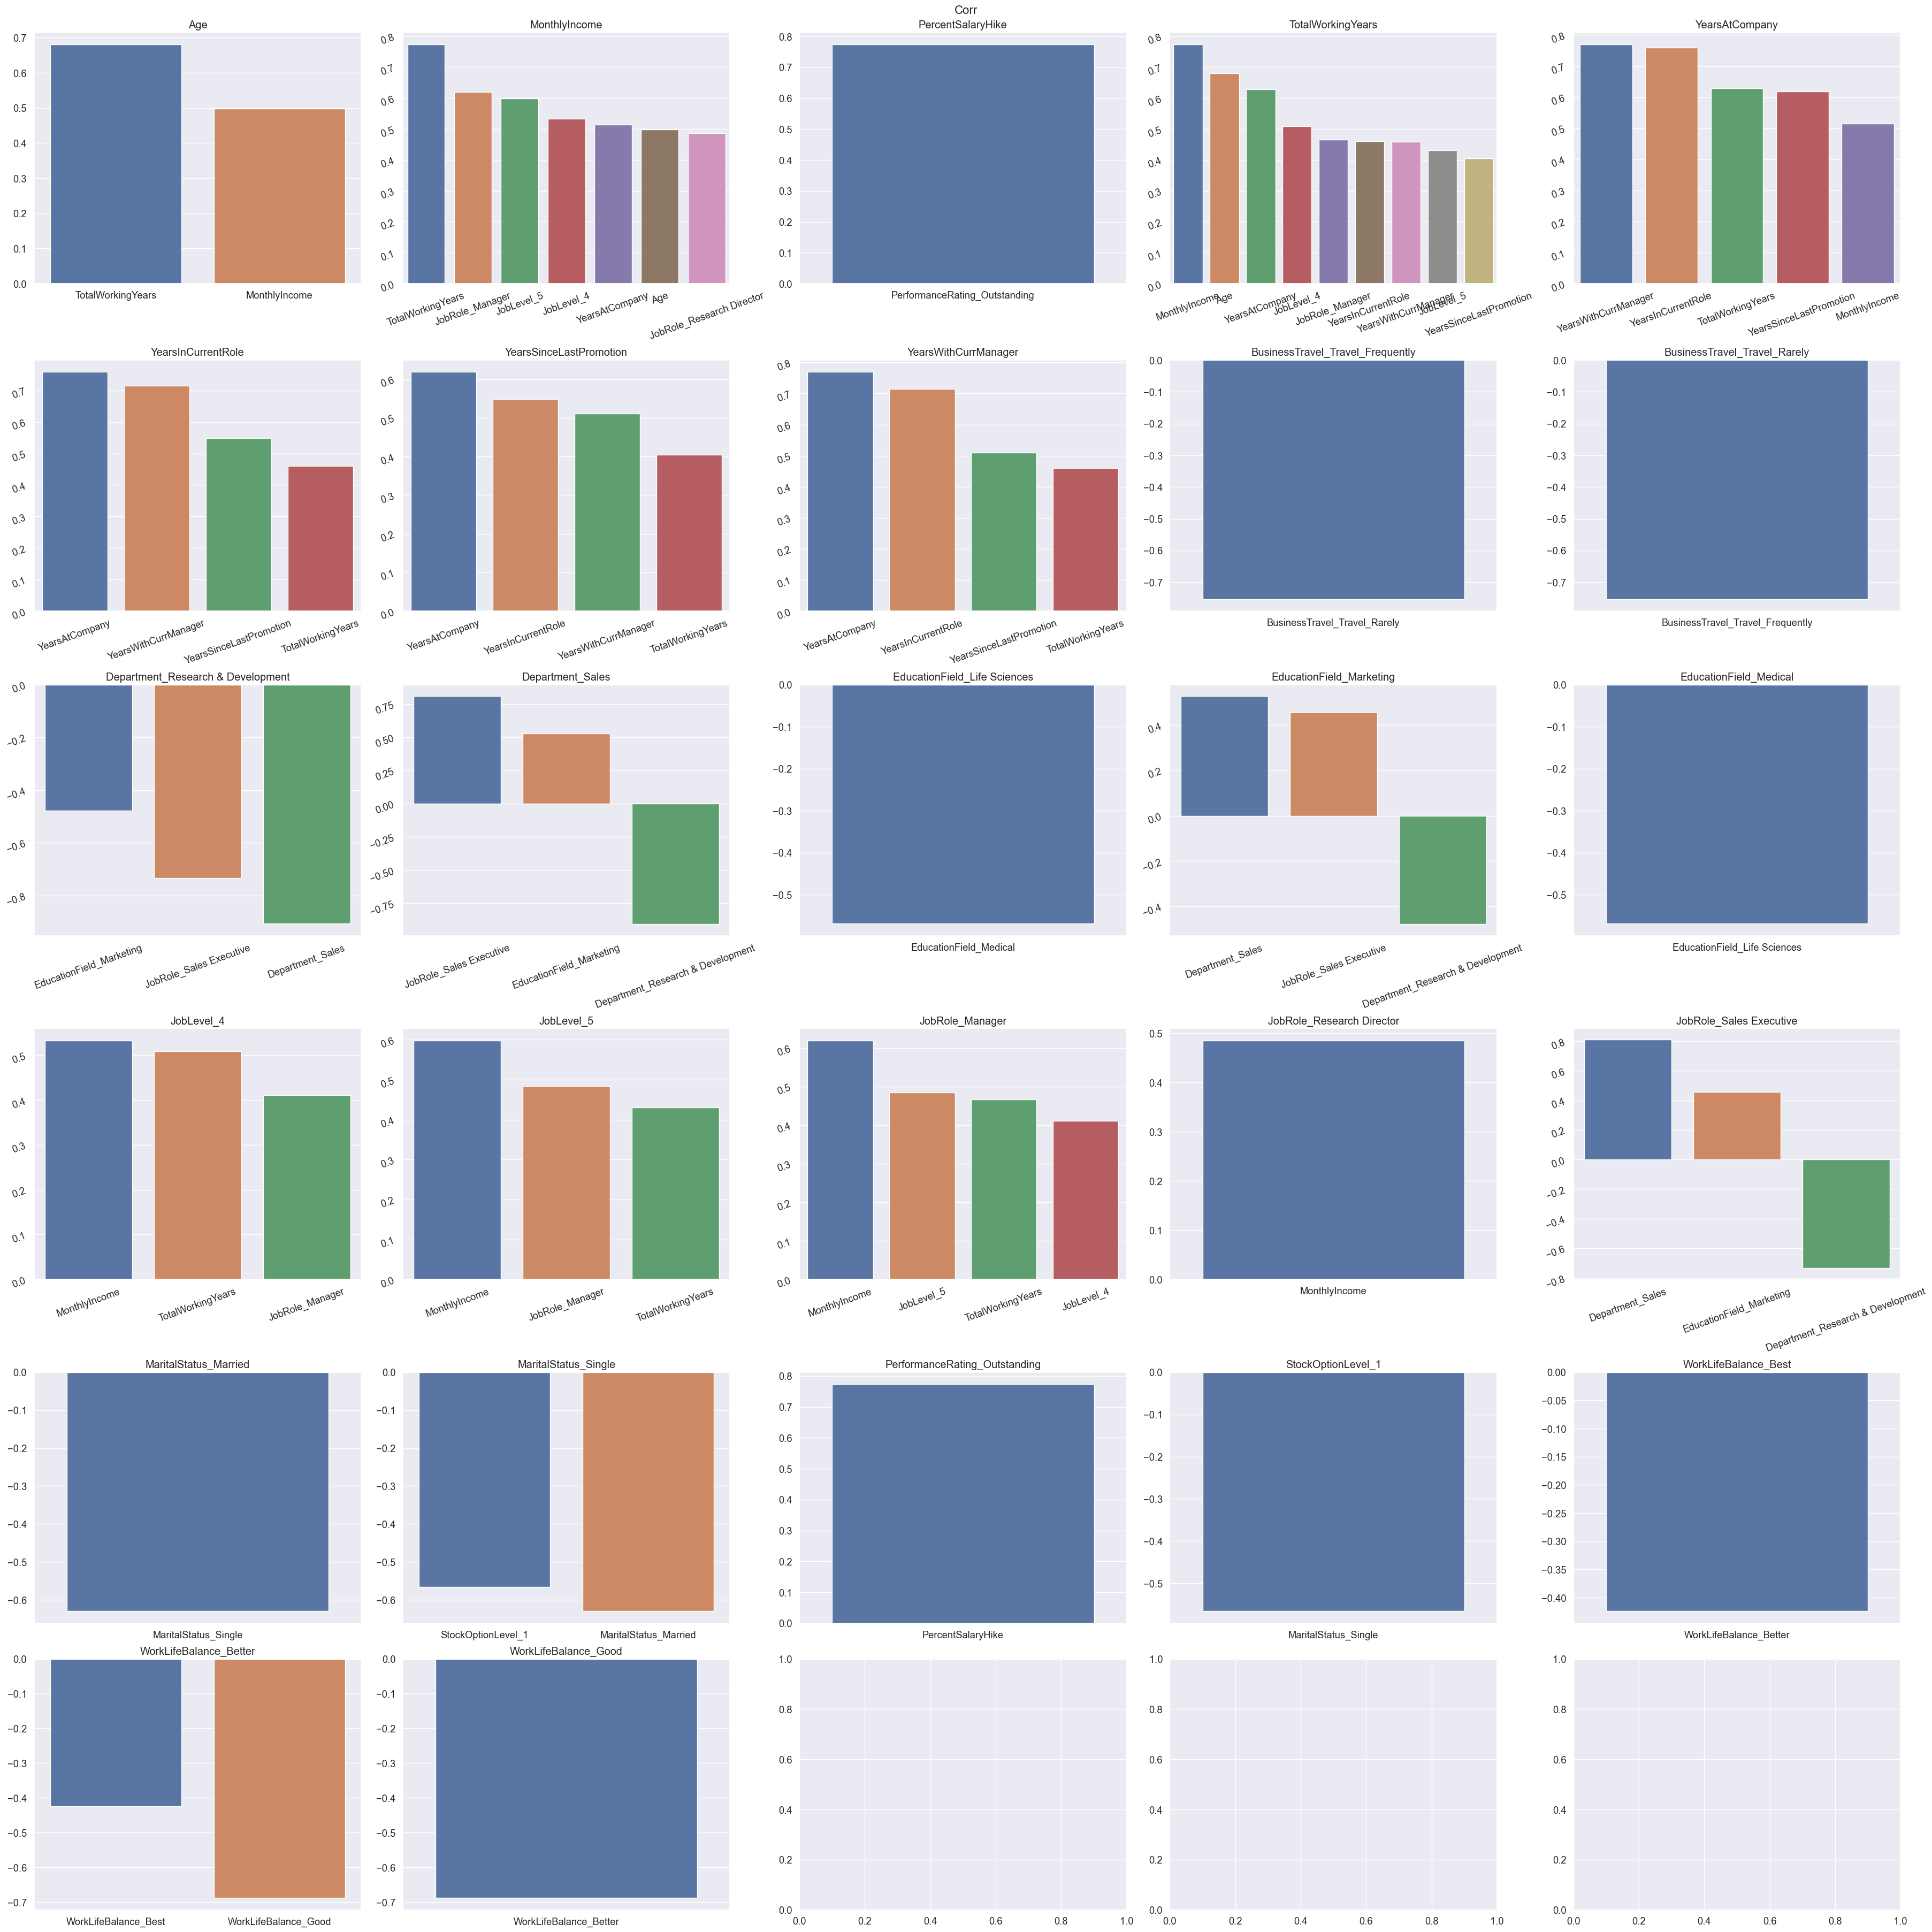

In [21]:
fig, ax = plt.subplots(6,5, figsize = (36, 36), constrained_layout=True)
fig.suptitle('Corr', fontsize=16)
ax = ax.flatten()

for i, c in enumerate(high_corr):
    ordered_d = OrderedDict(sorted(high_corr[i][1].items(), key=lambda t:t[1], reverse=True))
    title = ordered_d.popitem(0)
    
    sns.barplot(x = list(ordered_d.keys()), y = list(ordered_d.values()), ax = ax[i])
    ax[i].set(title = title[0])
    
    if len(ordered_d.keys()) > 2:
        ax[i].tick_params(labelrotation=20)
plt.savefig('corrbar.png')
plt.show()

* 월급여가 경력, 업무 수준, 나이와 관계가 높음을 알 수 있었다.

### 3.5.3 Attrition과의 상관관계

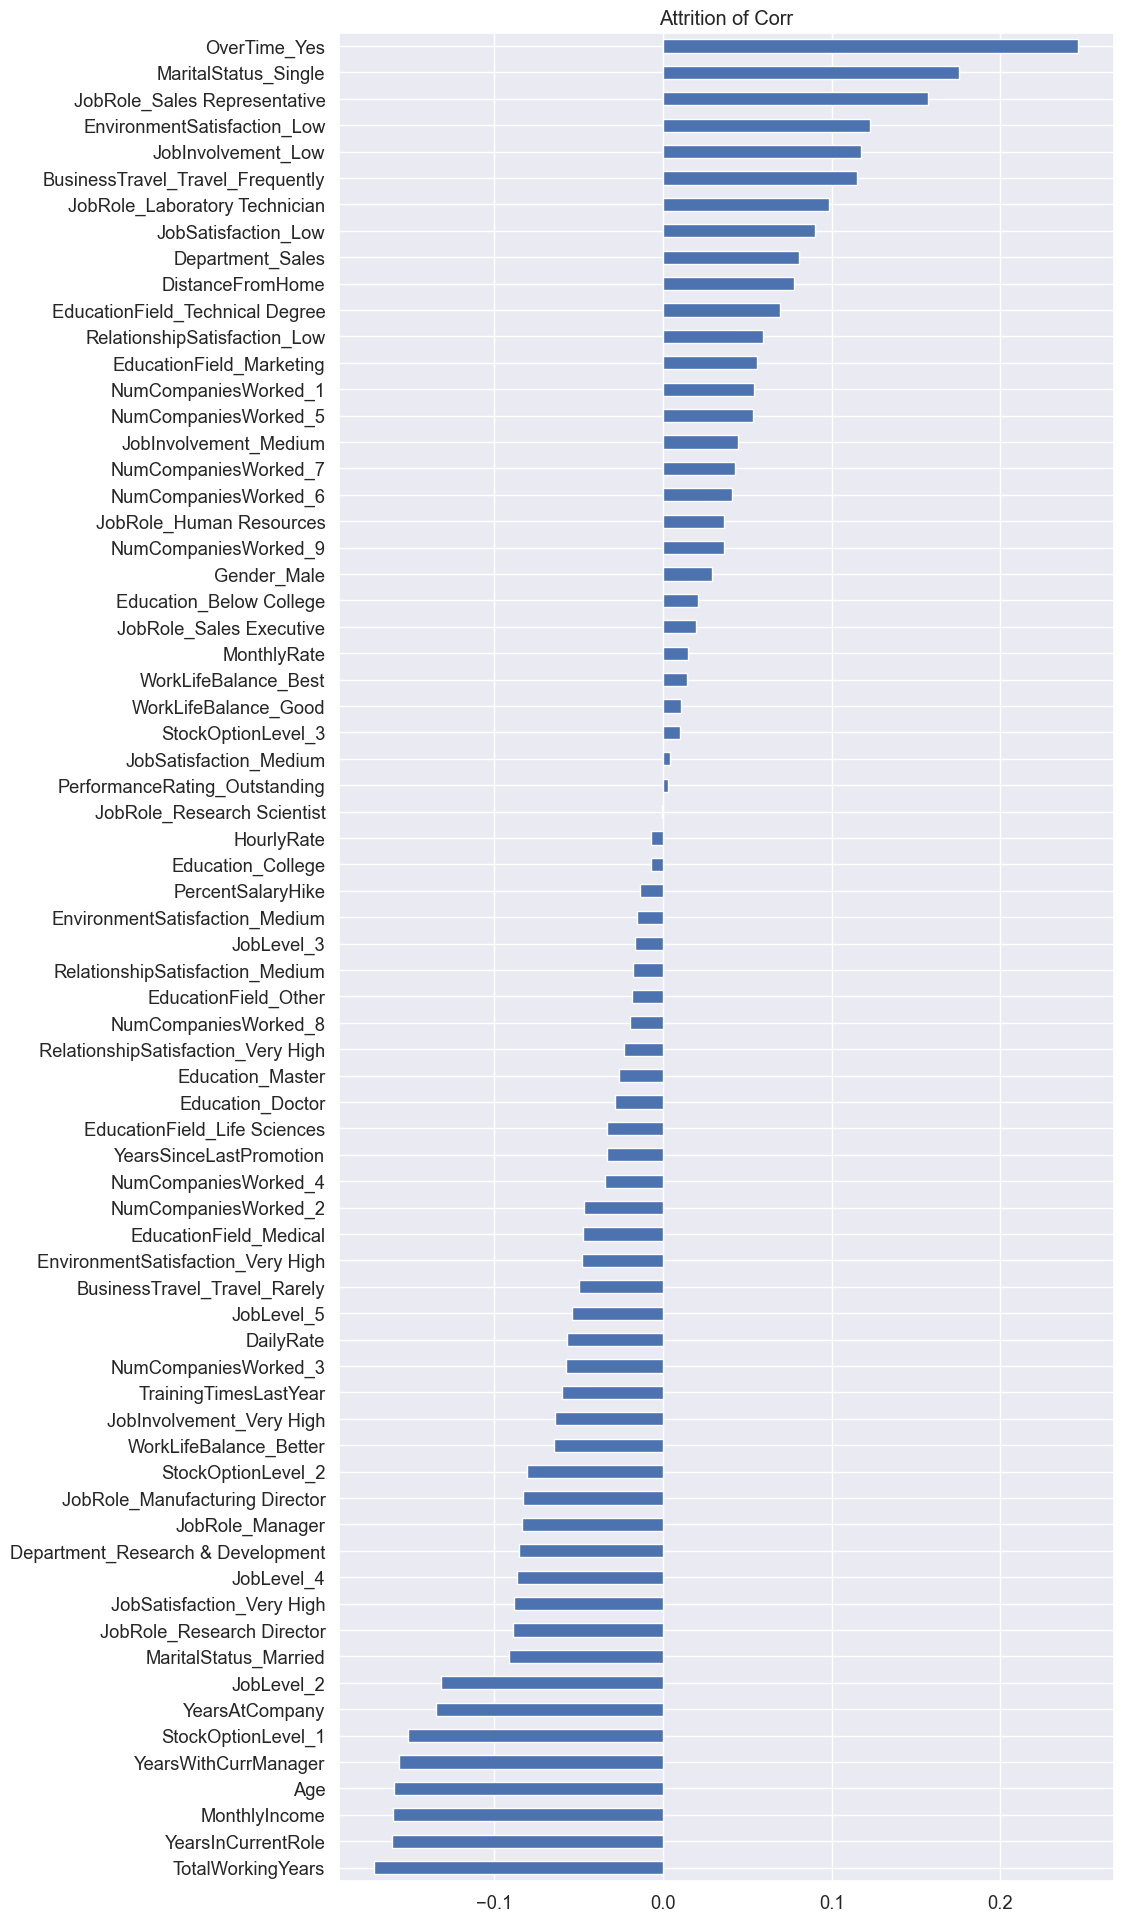

In [22]:
plt.title('Attrition of Corr')
df_cp.drop('Attrition_Yes', axis = 1).corrwith(df_cp.Attrition_Yes).sort_values().plot(kind='barh', figsize = (10, 24))
plt.show()

* 종속 변수 Attrition이 OverTime, TotalWorkingYear, MonthlyIncome과 관계가 있음을 알 수 있었다.

### 3.5.4 (다중)공선성 판단

* (다중)공선성 : 하나의 독립변수가 다른 (여러개)하나의 독립변수로 잘 예측되는 경우, 혹은 서로 상관이 높은 경우
* 분산팽창계수(VIF)를 구하여 판단
* 엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단(5를 기준으로 하기도 함)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_corr.values, i) for i in range(df_corr.shape[1])]
vif["features"] = df_corr.columns
vif.sort_values(by='VIF Factor', ascending = False)

VIF Factor                           features
17  13640.716455                   Department_Sales
16  13522.448575  Department_Research & Development
22   3238.702786       EducationField_Life Sciences
5    3212.315104                      MonthlyIncome
24   2882.516493             EducationField_Medical
..           ...                                ...
2       1.447858                          DailyRate
6       1.379119                        MonthlyRate
4       1.349891                         HourlyRate
30      1.328611                        Gender_Male
9       1.318633              TrainingTimesLastYear

[71 rows x 2 columns]

* vif가 Department의 경우 1300이 넘을 정도로 너무 높은 컬럼들이 있다.
* 높다고 다 drop할 순 없으니 Department만 일단 제외시킨다.

# 4. 가설 설정 및 변수 생성

1. 집과 거리가 먼 사람들이 퇴사를 맣이 할 것이다.
2. 월급여가 낮은 사람들이 퇴사를 많이 할 것이다.
3. 초기 경력자들이 퇴사를 많이 할 것이다. 
4. 워라벨이 안좋은 사람들이 퇴사를 할 것이다. 

In [38]:
# 컬럼별 퇴사비율 확인할 pivot 테이블 함수
def make_pivot(data, x, y, func):
    table = pd.pivot_table(data = data, values = 'Age', index = x, columns= y, aggfunc=func)
    table['total'] = table['No'] + table['Yes']
    table['Attrition_rate'] = table['Yes'] / table['total'] * 100
    return table

### 4.1 가설1 집과 거리가 먼 사람들이 퇴사를 많이 할 것이다.

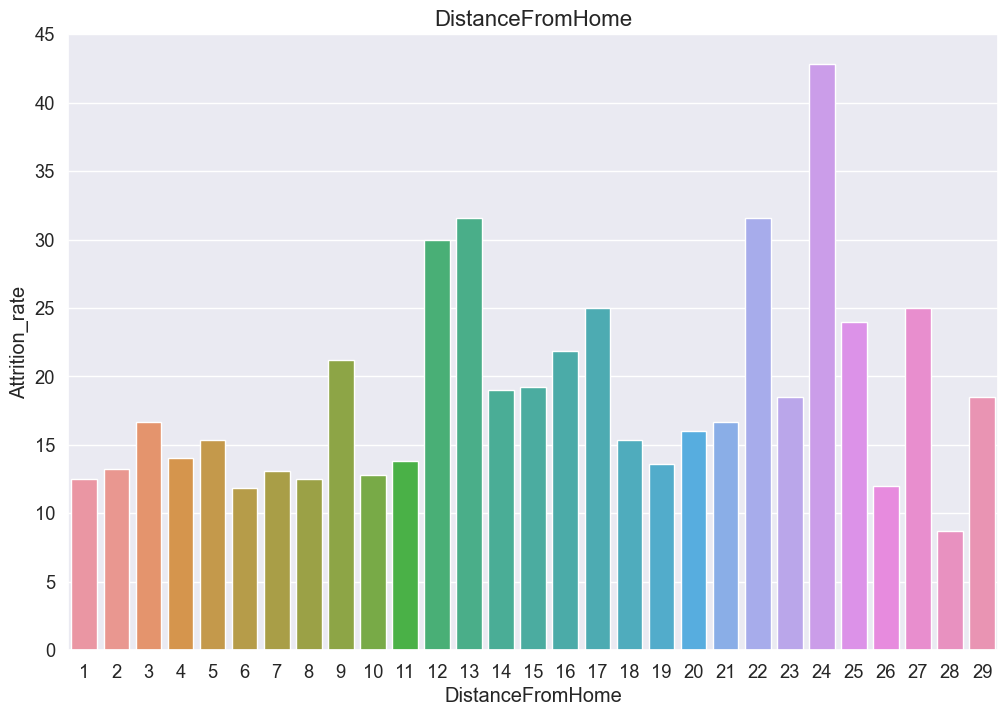

In [40]:
rate = make_pivot(df, 'DistanceFromHome', 'Attrition', func=len)

plt.figure(figsize=(12,8))
plt.title('DistanceFromHome', fontsize=16)
sns.barplot(x = rate.index, y = rate.Attrition_rate)
plt.show()

* 집에서 먼 사람이 가까운 사람들보다 퇴사를 많이 함
* 가장 많은 비율은 거리 24의 42.8% 전체 퇴사 인원의 5%이다. 
* 전체 퇴사인원 중 거리가 가까운 사람의 비율이 많지만, 거리가 가까운 인원이 전체에서 제일 많기 떄문이다. 

In [41]:
df['FarFromHome'] = np.where(df.DistanceFromHome >= 22 , 1, 0)
df['FarFromHome'] = df['FarFromHome'].astype(object)

* 거리 22부터 거리가 먼 사람들 컬럼 추가 

## 4.2 가설 2 월급여가 낮은 사람이 퇴사를 많이 할 것이다.

c:\Users\lbhde\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lbhde\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lbhde\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lbhde\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lbhde\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lbhde\anaconda3\

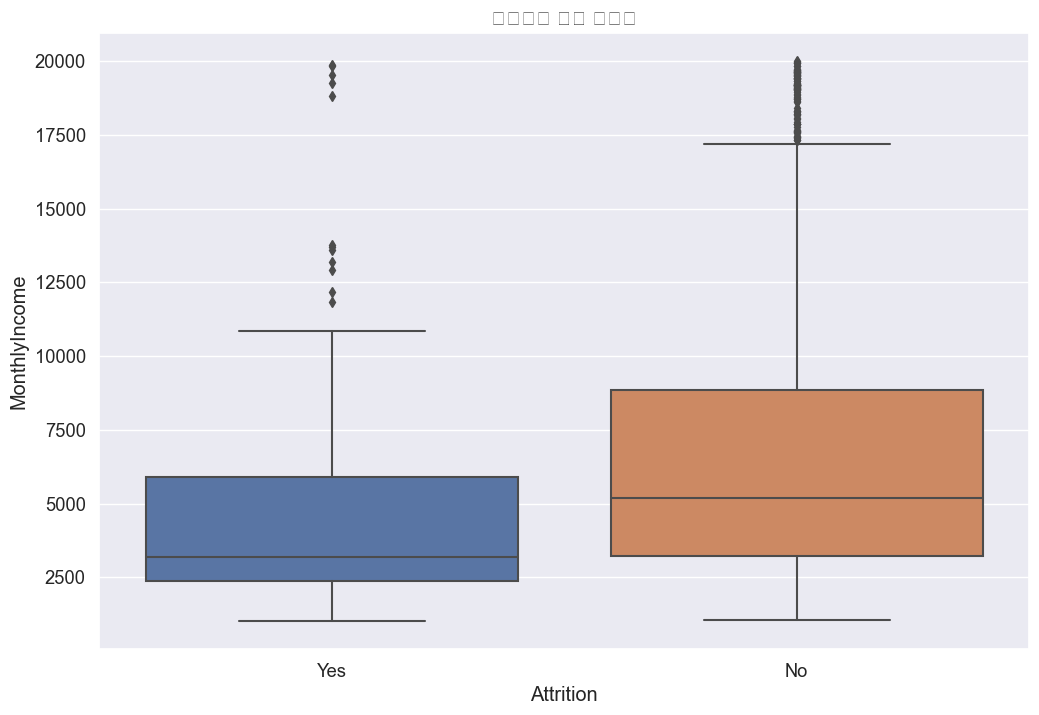

In [52]:
plt.figure(figsize = (12,8))
plt.title('월급여에 따른 퇴사율')
sns.boxplot(x = 'Attrition', y = 'MonthlyIncome', data = df)
plt.show()

* 그래프를 통해 급여가 낮은 사람들이 퇴사가 있어 보임
* 퇴사를 하지 않은 사람들의 중앙값이 퇴사한 사람들보다 위에 있고, 분포도 넓다.

In [44]:
df['LowMonthlyIncome'] = np.where(df.MonthlyIncome <= 3202 , 1, 0)
df['LowMonthlyIncome'] = df['LowMonthlyIncome'].astype(object)

월급여 낮은 사람 컬럼 추가

## 4.3 가설3 초기 경력자들이 퇴사를 많이 할 것이다.

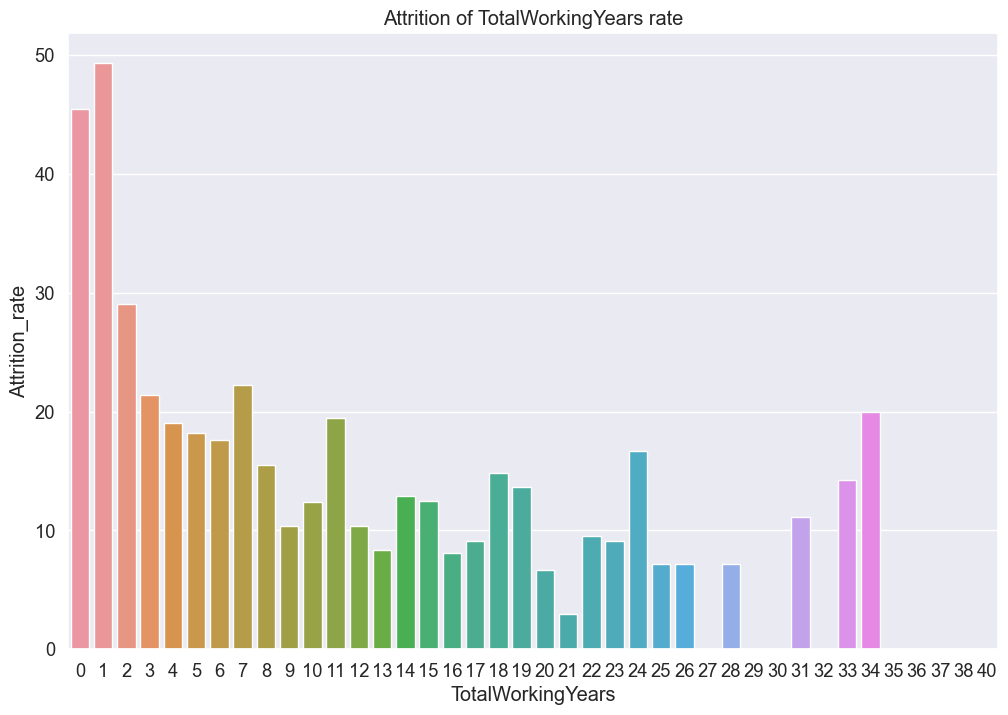

In [46]:
rate = make_pivot(df, 'TotalWorkingYears', 'Attrition', func= len).fillna(0)

plt.figure(figsize = (12,8))
plt.title('Attrition of TotalWorkingYears rate')
sns.barplot(x = rate.index, y = rate.Attrition_rate)
plt.show()

* 초기 경력자(0~2년)의 인원이 많은 퇴직율을 보임

In [47]:
df['LowWorkingYears'] = np.where(df.TotalWorkingYears <= 2 , 1, 0)
df['LowWorkingYears'] = df['LowWorkingYears'].astype(object)

## 4.4 가설4 워라벨이 안좋은 사람들이 퇴사를 많이 할 것이다. 

c:\Users\lbhde\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lbhde\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lbhde\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lbhde\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lbhde\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lbhde\anaconda3\

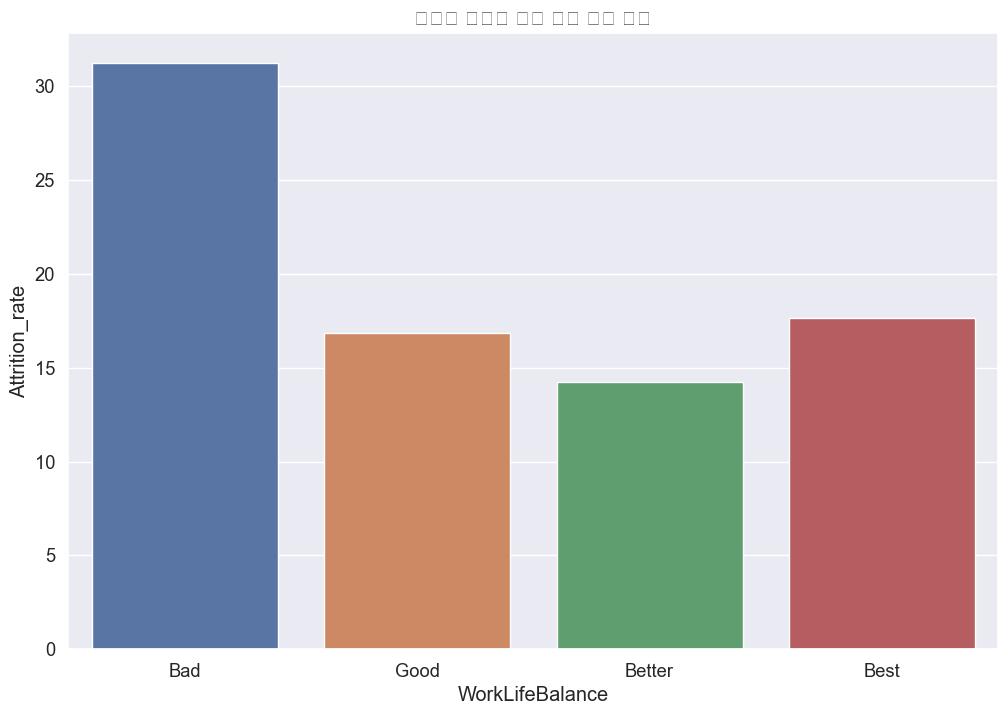

In [48]:
rate = make_pivot(df, 'WorkLifeBalance', 'Attrition', func= len)

plt.figure(figsize = (12,8))
plt.title('워라벨 정도에 따른 퇴사 인원 비율')
sns.barplot(x = rate.index, y = rate.Attrition_rate, order=['Bad', 'Good', 'Better', 'Best'])
plt.show()

* 워라벨이 'Bad'인 인원은 80명, 그 중 25명이 퇴사함 총 비율은 31%로 높은 퇴사율을 보임
* Best인 인원도 꽤 있어 의외의 결과이다. 
* 따라서 따로 컬럼을 추가하진 않는다.

# 5. Outlier, 컬럼 삭제

* MonthlyIncome 아웃라이어가 너무 크고 많으며 VIF 계수도 굉장히 높아 컬럼 삭제
* TotalWorkingYears 많지 않으나 VIF 높아 컬럼 삭제
* TrainingTimesLastYear 전체 데이터에 많은 부분을 차지해서 유지
* YearsSinceLastPromotion 전체 데이터에서 꽤 차지하고 있고, VIF가 낮아 유지
* YearsWithCurrManager 아웃라이어가 몇 개 없고 VIF도 낮아 유지
* YearsAtCompany 근속연수가 퇴사여부에 영향을 미칠 수도 있어 아웃라이어만 삭제
* YearsInCurrentRole 아웃라이이어가 많지 않고 VIF도 낮아 아웃라이어만 삭제

In [49]:
df_copy = df.copy()
outlier_df = pd.concat([outlier(df, 'YearsAtCompany'), outlier(df,'YearsInCurrentRole')]).drop_duplicates()
df_copy.drop(index=outlier_df.index, inplace=True)
df_copy.drop(labels=['MonthlyIncome', 'TotalWorkingYears', 'Age', 'Department',
                       'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'JobSatisfaction'], axis=1, inplace=True)

df_copy.shape

(1361, 27)